In [2]:
# imports
import numpy as np
import pandas as pd
import uproot
import os
from pprint import pprint
import pandas as pd
from hist import Hist
import hist

In [9]:
file_name = os.path.join("..", "Task_1_Data_Generation", "Root_Files", "temp.root")

In [10]:
# Step by step getting EcalBarrel events
root_file = uproot.open(file_name)
events_tree = root_file['events']
ecal_branch = events_tree['EcalBarrelHits']

# Shortcut to opening the events (remove the above line in production)
ecal_branch = uproot.open(file_name)['/events/EcalBarrelHits']
pprint(ecal_branch.keys())

['EcalBarrelHits.cellID',
 'EcalBarrelHits.energy',
 'EcalBarrelHits.position.x',
 'EcalBarrelHits.position.y',
 'EcalBarrelHits.position.z',
 'EcalBarrelHits.contributions_begin',
 'EcalBarrelHits.contributions_end']


In [11]:
branches ={
    "id": "EcalBarrelHits.cellID",
    "x": "EcalBarrelHits.position.x",
    "y": "EcalBarrelHits.position.y",
    "z": "EcalBarrelHits.position.z",
    "energy": "EcalBarrelHits.energy"
}

In [13]:
ecal_events = ecal_branch.arrays(branches.keys(), aliases=branches, entry_start=0, entry_stop=20)

for event in ecal_events:
    # if not len(event['id']):
    #     continue
    print(event)

... 7.26e-05, 6.92e-05, 7.18e-05, 8.71e-05, 0.000104, 9.18e-05, 4.24e-06]}
... 0.000428, 7.61e-05, 0.000293, 0.000388, 0.000162, 0.000223, 0.000309]}
... 0.000459, 6.22e-05, 0.000288, 0.000146, 0.000233, 5.86e-05, 0.000574]}
... 5.56e-05, 0.000241, 0.000171, 0.000166, 0.000129, 1.99e-05, 1.26e-05]}
... id: [18407618935999759973], x: [-983], y: [583], z: [-430], energy: [0.000277]}
... 4.31e-06, 0.000196, 2.22e-05, 6.59e-05, 0.00045, 0.000156, 9.76e-05, 0.0002]}
... 0.000158, 3.43e-05, 0.000384, 0.000191, 0.000256, 0.000711, 0.000379, 0.00017]}
... 0.000166, 0.000254, 0.000486, 0.000214, 5.32e-06, 1.25e-05, 0.000159]}
... 0.000348, 8.31e-05, 0.000107, 9.36e-05, 6.84e-05, 6.61e-05, 0.000101]}
... 4.72e-06, 0.00019, 0.000138, 0.000201, 0.000138, 5.78e-05, 0.000163, 0.000134]}
... -232], y: [-1.03e+03, -1.03e+03], z: [-11, -11], energy: [0.000103, 3.42e-05]}
... 0.000198, 5.24e-05, 1.91e-05, 0.000286, 0.000104, 0.000301, 0.000191]}
... 0.000155, 0.000182, 0.000219, 3.28e-05, 0.000123, 0.00

In [14]:
def decode_id(id):
    # <id>system:8,module:8,layer:8,slice:8,x:32:-16,y:-16</id>

    # 1 500 422  = 0x16E506 = 0x16 0xE5 0x06
    # 0x16 0xE5 0x06  ||  0x06 0xE5 0x16

    # our id (ALL values in HEX below)
    # FF B9 FF 91 01 03 0A 65
    # 
    # system =  FF B9 FF 91 01 03 0A 65   &   00 00 00 00 00 00 00 FF = 65
    # module
    # FF B9 FF 91 01 03 0A 65 >> 8  =  00 FF B9 FF 91 01 03 0A
    # module = 00 FF B9 FF 91 01 03 0A   &   00 00 00 00 00 00 00 FF = 0A
    
    system = id & 0xFF
    module = (id >> 8) & 0xFF
    layer = (id >> 16) & 0xFF
    slice = (id >> 24) & 0xFF
    x = np.int16((id >> 32) & 0xFFFF)
    y = np.int16((id >> 48) & 0xFFFF)    
    
    return system, module, layer, slice, x, y

# Now run loop and decode values
ecal_events = ecal_branch.arrays(branches.keys(), aliases=branches, entry_start=0, entry_stop=50)

for event in ecal_events:
    ids = event['id']
    delta_energies = event['energy']

    # Skip empty events
    if not len(ids):
        continue

    #print("==== Event =====")

    for id, de in zip(ids, delta_energies):
        system, module, layer, slice, module_x, module_y = decode_id(id)
        print(f"system={system} module={module} layer={layer}, slice={slice}, module_x={module_x}, module_y={module_y}, delta_energies={delta_energies}")

system=101 module=2 layer=1, slice=1, module_x=-464, module_y=735, delta_energies=[0.00042, 1.82e-05, 0.000165, 0.000162, ... 8.71e-05, 0.000104, 9.18e-05, 4.24e-06]
system=101 module=2 layer=1, slice=1, module_x=-462, module_y=735, delta_energies=[0.00042, 1.82e-05, 0.000165, 0.000162, ... 8.71e-05, 0.000104, 9.18e-05, 4.24e-06]
system=101 module=2 layer=1, slice=1, module_x=-410, module_y=747, delta_energies=[0.00042, 1.82e-05, 0.000165, 0.000162, ... 8.71e-05, 0.000104, 9.18e-05, 4.24e-06]
system=101 module=2 layer=1, slice=1, module_x=-445, module_y=789, delta_energies=[0.00042, 1.82e-05, 0.000165, 0.000162, ... 8.71e-05, 0.000104, 9.18e-05, 4.24e-06]
system=101 module=2 layer=1, slice=1, module_x=-437, module_y=792, delta_energies=[0.00042, 1.82e-05, 0.000165, 0.000162, ... 8.71e-05, 0.000104, 9.18e-05, 4.24e-06]
system=101 module=2 layer=1, slice=1, module_x=-452, module_y=794, delta_energies=[0.00042, 1.82e-05, 0.000165, 0.000162, ... 8.71e-05, 0.000104, 9.18e-05, 4.24e-06]
syst

In [16]:
# Now run loop and decode values
ecal_events = ecal_branch.arrays(branches.keys(), aliases=branches, entry_start=0, entry_stop=5000)

df = pd.DataFrame({
    "evt": pd.Series(dtype='int'),
    "module": pd.Series(dtype='int'),
    "layer": pd.Series(dtype='int'),
    "slice": pd.Series(dtype='int'),
    "gx": pd.Series(dtype='int'),
    "gy": pd.Series(dtype='int'),
    "x": pd.Series(dtype='float'),
    "y": pd.Series(dtype='float'),
    "z": pd.Series(dtype='float'),
    "energy": pd.Series(dtype='float')
})


print(df)
for event_id, event in enumerate(ecal_events):
    ids = event['id']
    delta_energies = event['energy']
    true_x = event['x']
    true_y = event['y']
    true_z = event['z']

    # Skip empty events
    if len(ids) < 1:
        continue

    #print("==== Event =====")

    for id, x, y, z, energy in zip(ids, true_x, true_y, true_z, delta_energies):
        system, module, layer, slice, grid_x, grid_y = decode_id(id)
        #print(f"evt={event_id} system={system} module={module} layer={layer}, slice={slice}, grid_x={grid_x}, grid_y={grid_y}, delta_energies={delta_energies}")
        
        # append data frame
        df.loc[len(df)] = [event_id, module, layer, slice, grid_x, grid_y, x, y, z, energy]

Empty DataFrame
Columns: [evt, module, layer, slice, gx, gy, x, y, z, energy]
Index: []


In [17]:
# Save dataframe
df.to_pickle("hits_temp_df.pkl")
df

,evt,module,layer,slice,gx,gy,x,y,z,energy
0,0.0,2.0,1.0,1.0,-464.0,735.0,-232.0,-1030.25,7.5,0.000420
1,0.0,2.0,1.0,1.0,-462.0,735.0,-231.0,-1030.25,7.5,0.000018
2,0.0,2.0,1.0,1.0,-410.0,747.0,-205.0,-1030.25,13.5,0.000165
3,0.0,2.0,1.0,1.0,-445.0,789.0,-222.5,-1030.25,34.5,0.000162
4,0.0,2.0,1.0,1.0,-437.0,792.0,-218.5,-1030.25,36.0,0.000158
...,...,...,...,...,...,...,...,...,...,...
1503,99.0,2.0,1.0,1.0,-315.0,751.0,-157.5,-1030.25,15.5,0.000115
1504,99.0,2.0,1.0,1.0,-323.0,751.0,-161.5,-1030.25,15.5,0.000140
1505,99.0,2.0,1.0,1.0,-324.0,750.0,-162.0,-1030.25,15.0,0.000042
1506,99.0,2.0,1.0,1.0,-307.0,754.0,-153.5,-1030.25,17.0,0.000165


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f5bb17c4220>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f5bb18e6700>, text=[])

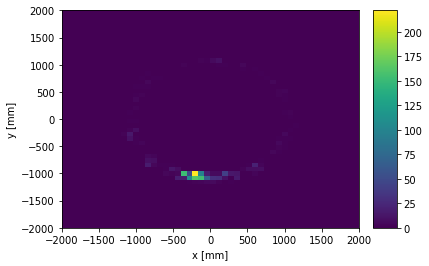

In [19]:
hist_xy = Hist(
    hist.axis.Regular(50, -2000, 2000, name="x", label="x [mm]", flow=False),
    hist.axis.Regular(50, -2000, 2000, name="y", label="y [mm]", flow=False),
)
hist_xy.fill(df.x, df.y)
hist_xy.plot2d()

<AxesSubplot:xlabel='x', ylabel='y'>

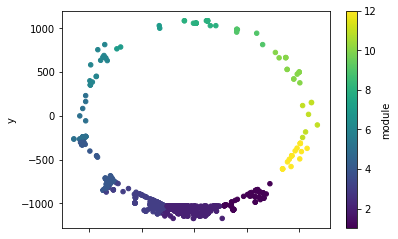

In [20]:
df.plot.scatter(x='x', y='y', c='module', colormap='viridis')

In [21]:
#How many hits we have in each module? 

print("hits per module")
for module, group in df.groupby('module'):
    print(f"module={int(module)}     Nhits ={len(group)}")

hits per module
module=1     Nhits =93
module=2     Nhits =910
module=3     Nhits =332
module=4     Nhits =59
module=5     Nhits =25
module=6     Nhits =16
module=7     Nhits =4
module=8     Nhits =20
module=9     Nhits =7
module=10     Nhits =14
module=11     Nhits =7
module=12     Nhits =21


<AxesSubplot:xlabel='x', ylabel='y'>

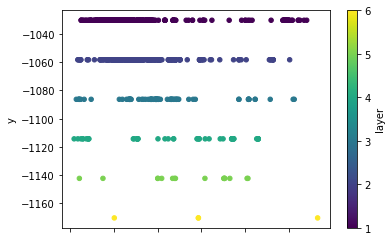

In [25]:
mask = df.module == 2
df[mask].plot.scatter(x='x', y='y', c='layer', colormap='viridis')
